In [1]:
import ezdxf

In [2]:
import ezdxf
import math

def analyze_polylines(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    
    arrs = []
    
    for inde,entity in enumerate(msp.query('LWPOLYLINE POLYLINE')):
        print(inde)
        arr = []
        print(f"\n--- {entity.dxftype()} ---")
        print(f"Layer: {entity.dxf.layer}")
        
        if entity.dxftype() == 'LWPOLYLINE':
            # Lightweight polyline
            points = list(entity.get_points())
            print(f"Points count: {len(points)}")
            print(f"Closed: {entity.closed}")
            print(f"Elevation: {entity.dxf.elevation}")
            
            # Calculate length
            total_length = 0
            for i in range(len(points) - 1):
                x1, y1 = points[i][:2]
                x2, y2 = points[i + 1][:2]
                segment_length = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                total_length += segment_length
                print(f"  Segment {i+1}: ({x1:.2f}, {y1:.2f}) -> ({x2:.2f}, {y2:.2f}) [Length: {segment_length:.2f}]")
            
            print(f"Total length: {total_length:.2f}")
            
            # Check for bulges (curved segments)
            if hasattr(entity, 'get_points_with_bulge'):
                points_with_bulge = list(entity.get_points_with_bulge())
                for i, (point, bulge) in enumerate(points_with_bulge):
                    if bulge != 0:
                        print(f"  Point {i+1} has bulge: {bulge} (curved segment)")
        
        elif entity.dxftype() == 'POLYLINE':
            # Heavy polyline
            vertices = entity.vertices
            print(f"Vertices count: {len(vertices)}")
            print(f"Closed: {entity.is_closed}")
            print(f"Is 3D: {entity.is_3d_polyline}")
            
            for i, vertex in enumerate(vertices):
                location = vertex.dxf.location
                print(f"  Vertex {i+1}: ({location.x:.2f}, {location.y:.2f}, {location.z:.2f})")
                arr.append((location.x, location.y, location.z))
        arrs.append(arr)
    return arrs                

# Usage
data = analyze_polylines("./data/dgn_int_pit_jakarta.dxf")

0

--- POLYLINE ---
Layer: 1
Vertices count: 10
Closed: False
Is 3D: True
  Vertex 1: (702279.24, 9315910.70, 90.00)
  Vertex 2: (702159.80, 9315955.85, 90.00)
  Vertex 3: (701947.05, 9316130.30, 90.00)
  Vertex 4: (701943.88, 9316134.40, 90.00)
  Vertex 5: (701927.83, 9316138.71, 90.00)
  Vertex 6: (701940.40, 9316639.62, 90.00)
  Vertex 7: (701942.36, 9316645.80, 90.00)
  Vertex 8: (701947.38, 9316649.90, 90.00)
  Vertex 9: (701963.26, 9316656.51, 90.00)
  Vertex 10: (702141.44, 9316640.21, 90.00)
1

--- POLYLINE ---
Layer: 1
Vertices count: 3
Closed: False
Is 3D: True
  Vertex 1: (702219.87, 9316633.03, 90.00)
  Vertex 2: (702269.79, 9316628.46, 90.00)
  Vertex 3: (702330.83, 9316626.29, 90.00)
2

--- POLYLINE ---
Layer: 1
Vertices count: 4
Closed: False
Is 3D: True
  Vertex 1: (702355.18, 9316625.42, 90.00)
  Vertex 2: (702369.17, 9316624.92, 90.00)
  Vertex 3: (702369.58, 9316609.93, 90.00)
  Vertex 4: (702374.20, 9316609.49, 90.00)
3

--- POLYLINE ---
Layer: 1
Vertices count: 19


In [12]:
x = np.array(data)
y = np.array(data)
# plt.plot(x,y,label=f"{i}")
data

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (24,) + inhomogeneous part.

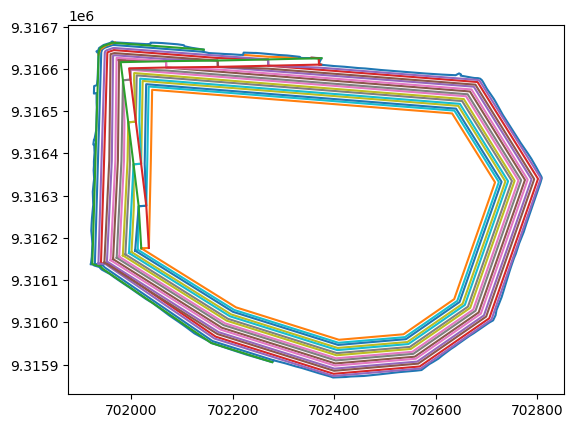

In [13]:
import numpy as np
import matplotlib.pyplot as plt

for i,data_plot in enumerate(data):
    x = np.array(data_plot)[:,0]
    y = np.array(data_plot)[:,1]
    plt.plot(x,y,label=f"{i}")
    # plt.plot(x,y)
    # print(x)
# plt.legend()